In [1]:
%matplotlib inline

# General libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
plt.style.use('fivethirtyeight')



In [2]:
df = pd.read_csv('train.csv', parse_dates=[0])
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
df = df.drop(['Descript', 'Resolution'], axis=1)

In [4]:
print (df.shape)
df.dtypes

(878049, 7)


Dates         datetime64[ns]
Category              object
DayOfWeek             object
PdDistrict            object
Address               object
X                    float64
Y                    float64
dtype: object

In [5]:
# validate data
print("Date range: ",df.Dates.min(),df.Dates.max())
print("Number of Categories: ", len(df.Category.unique()))
print("\nCategory: ")
print(df.Category.value_counts())

# Issue: Top categories 100-1000x more prevalent than bottom categories

Date range:  2003-01-06 00:01:00 2015-05-13 23:53:00
Number of Categories:  39

Category: 
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       23

In [6]:
# check values for categorical fields
print("Day of Week: ")
print(df.DayOfWeek.value_counts())
print("\nDistrict: ")
print(df.PdDistrict.value_counts())
print("\nAddress: ")
print(df.Address.value_counts())


Day of Week: 
Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

District: 
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

Address: 
800 Block of BRYANT ST                   26533
800 Block of MARKET ST                    6581
2000 Block of MISSION ST                  5097
1000 Block of POTRERO AV                  4063
900 Block of MARKET ST                    3251
0 Block of TURK ST                        3228
0 Block of 6TH ST                         2884
300 Block of ELLIS ST                     2703
400 Block of ELLIS ST                     2590
16TH ST / MISSION ST                      2504
1000 Block of MARKET ST                   2489
1100 Block of MARKET ST            

In [7]:
# check X,Y values
print(df.X.describe())
print('\n', df.Y.describe())


count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

 count    878049.000000
mean         37.771020
std           0.456893
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784369
max          90.000000
Name: Y, dtype: float64


In [8]:
# Note there are 67 entries with incorrect X, Y. Probably easiest just to remove them

df[df.X > -122]

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,Friday,TENDERLOIN,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,Friday,BAYVIEW,JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,Friday,BAYVIEW,JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,Thursday,TENDERLOIN,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,Wednesday,TENDERLOIN,5THSTNORTH ST / ELLIS ST,-120.5,90.0
667042,2005-11-28 16:04:00,TRESPASS,Monday,TENDERLOIN,ELLIS ST / 5THSTNORTH ST,-120.5,90.0
669946,2005-11-14 09:20:00,OTHER OFFENSES,Monday,BAYVIEW,YOSEMITE AV / WILLIAMS AV,-120.5,90.0
671709,2005-11-02 20:30:00,OTHER OFFENSES,Wednesday,CENTRAL,BRENHAM PL / WASHINGTON ST,-120.5,90.0
673078,2005-10-23 20:00:00,LARCENY/THEFT,Sunday,RICHMOND,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0
673114,2005-10-23 18:11:00,WARRANTS,Sunday,TARAVAL,STCHARLES AV / 19TH AV,-120.5,90.0


## Analysis of Crime by District

In [9]:
# Group by District and Category

grouped_dist = pd.DataFrame(df.groupby(['PdDistrict','Category']).count())
grouped_dist.reset_index(inplace=True)
#grouped_dist.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_dist_wide = grouped_dist.pivot(index='PdDistrict', columns='Category', values = 'Dates')
grouped_dist_wide

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,393.0,9857.0,34.0,56.0,3930.0,219.0,179.0,4498.0,243.0,100.0,...,22.0,397.0,37.0,3906.0,3.0,636.0,5356.0,7219.0,4322.0,1647.0
CENTRAL,111.0,6977.0,65.0,12.0,4519.0,494.0,160.0,1805.0,517.0,180.0,...,7.0,510.0,60.0,2842.0,1.0,904.0,4469.0,4210.0,2777.0,487.0
INGLESIDE,182.0,8533.0,32.0,53.0,3331.0,171.0,206.0,2373.0,190.0,78.0,...,22.0,347.0,65.0,3167.0,NaN,416.0,5374.0,8960.0,2528.0,1130.0
MISSION,145.0,11149.0,46.0,66.0,3745.0,1099.0,357.0,8757.0,782.0,124.0,...,35.0,631.0,72.0,3808.0,1.0,1021.0,5294.0,7148.0,6615.0,1329.0
NORTHERN,149.0,8318.0,54.0,18.0,5854.0,452.0,260.0,4511.0,368.0,131.0,...,9.0,700.0,67.0,3270.0,1.0,780.0,5404.0,6291.0,4599.0,789.0
PARK,65.0,3515.0,15.0,7.0,2888.0,271.0,176.0,2573.0,374.0,50.0,...,6.0,175.0,20.0,1656.0,NaN,290.0,2613.0,3963.0,2318.0,357.0
RICHMOND,103.0,3202.0,31.0,8.0,2696.0,108.0,319.0,999.0,149.0,43.0,...,10.0,206.0,42.0,2191.0,NaN,245.0,3180.0,4117.0,1010.0,327.0
SOUTHERN,185.0,12183.0,74.0,37.0,4841.0,511.0,306.0,9228.0,959.0,275.0,...,17.0,1007.0,59.0,5065.0,NaN,1456.0,6550.0,4725.0,9102.0,1128.0
TARAVAL,120.0,5463.0,36.0,17.0,3463.0,162.0,202.0,1531.0,259.0,94.0,...,15.0,231.0,59.0,2996.0,NaN,386.0,4869.0,6142.0,1617.0,567.0


Text(0,0.5,'Number of Crimes')

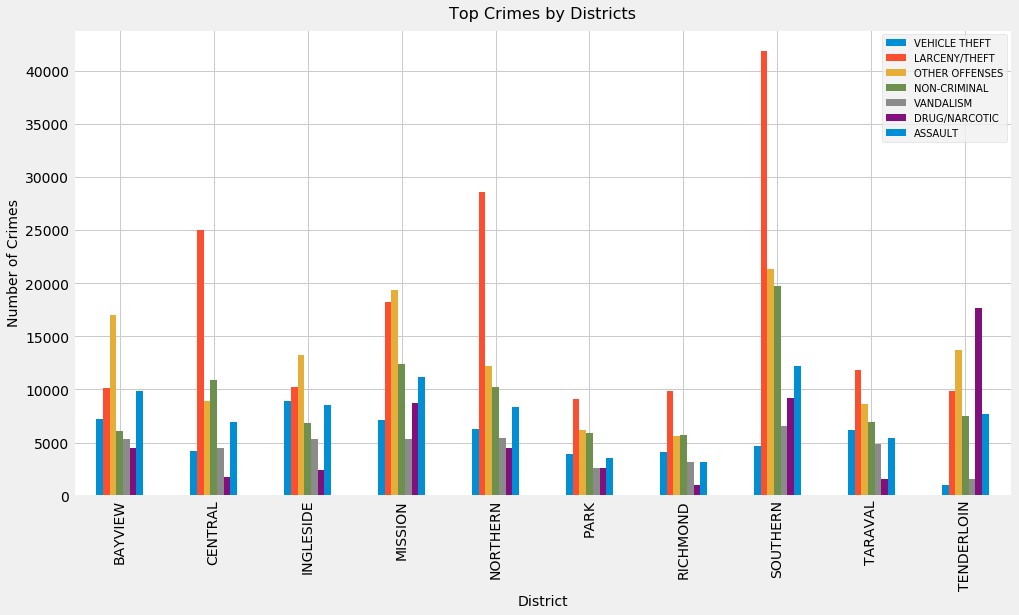

In [12]:
# crimes by district for top categories
top_5 = df.Category.value_counts().head(7)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_facecolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crimes by Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

Text(0,0.5,'Number of Crimes')

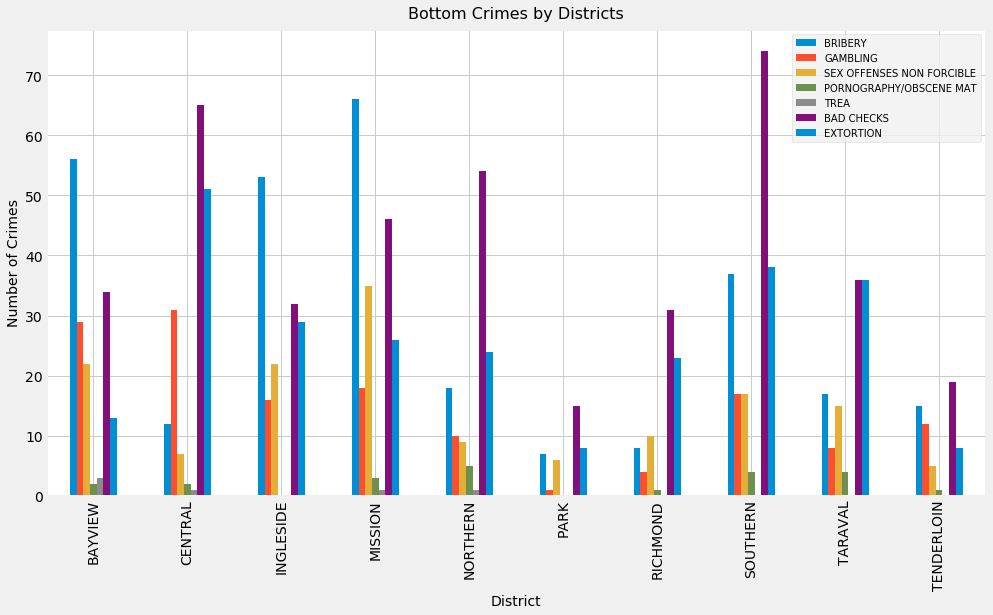

In [13]:
# crimes by district for bottom categories
top_5 = df.Category.value_counts().tail(7)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_facecolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Bottom Crimes by Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

## Visualization of Seasonality

In [14]:
# Add Hours, Days, Months, Years 
df['DOW'] = df.Dates.dt.weekday
df['DOM'] = df.Dates.dt.day
df['HOUR'] = df.Dates.dt.hour
df['MONTH'] = df.Dates.dt.month
df['YEAR'] = df.Dates.dt.year

In [15]:
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,DOW,DOM,HOUR,MONTH,YEAR
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2,13,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2,13,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2,13,23,5,2015


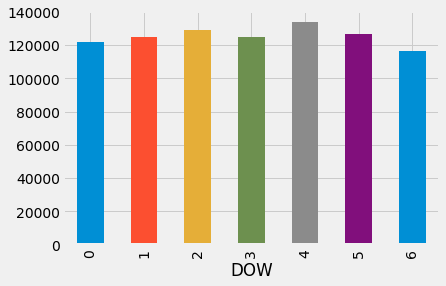

In [16]:
df.groupby(df.DOW).Dates.count().plot.bar()

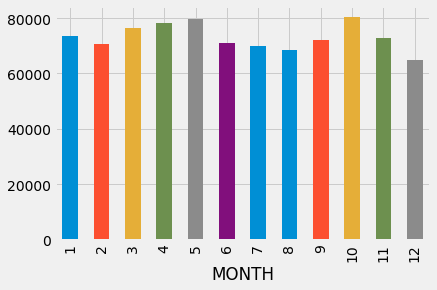

In [17]:
df.groupby(df.MONTH).Dates.count().plot.bar()

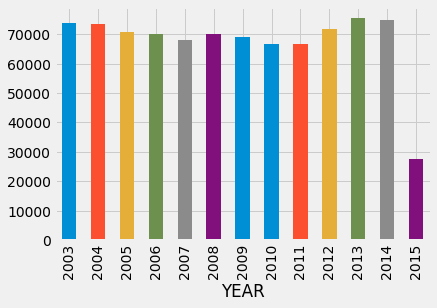

In [18]:
df.groupby(df.YEAR).Dates.count().plot.bar()

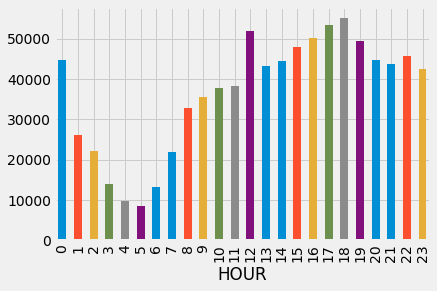

In [19]:
df.groupby(df.HOUR).Dates.count().plot.bar()

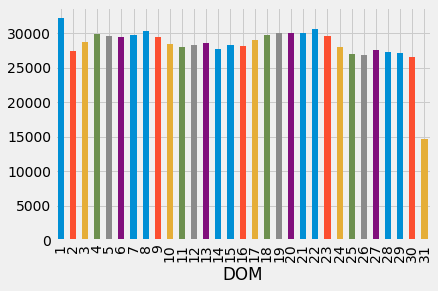

In [20]:
df.groupby(df.DOM).Dates.count().plot.bar()

## Location Analysis


In [62]:
test1 = df[(df.PdDistrict == 'SOUTHERN') & (df.Category == 'ARSON')]
fig = plt.figure(figsize=(15,10))
plt.scatter(test1.X , test1.Y)
mplleaflet.display(fig)


In [63]:
test2 = df[(df.PdDistrict == 'RICHMOND') & (df.Category == 'VEHICLE THEFT') & (df.YEAR == 2004)]
fig = plt.figure(figsize=(15,10))
plt.scatter(test2.X , test2.Y)
mplleaflet.display(fig)

In [64]:
# Crimes with particular address
test3 = df[(df.Address.str.contains('MARKET')) & (df.Category == 'VEHICLE THEFT')]
fig = plt.figure(figsize=(15,10))
plt.scatter(test3.X , test3.Y)
mplleaflet.display(fig)